In [1]:
import pandas as pd
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
stk_data = yf.Ticker("SPY")
print(stk_data.ticker)
df_data = stk_data.history(period='10y')

df_data['Week'] = df_data.index.isocalendar().week
df_data['Day'] = df_data.index.isocalendar().day

df_data['PrevDayChng'] = df_data['Close'].pct_change(periods=1).shift(1).fillna(0)

df_data['EMA5'] = df_data.Close.ewm(span=5, adjust=False).mean()
df_data['EMA12'] = df_data.Close.ewm(span=12, adjust=False).mean()
df_data['EMA26'] = df_data.Close.ewm(span=26, adjust=False).mean()
df_data['MACD'] = df_data.EMA12-df_data.EMA26
df_data['Signal'] = df_data.MACD.ewm(span=9, adjust=False).mean()

# % Change in 2 weeks
df_data['Short_Gain'] = df_data.Close.pct_change(10).shift(-10)
df_data['Short_Gain'] = df_data['Short_Gain'].fillna(df_data['Short_Gain'].mean())

# % change in 3 months
df_data['Long_Gain'] = df_data.Close.pct_change(60).shift(-60)
df_data['Long_Gain'] = df_data['Long_Gain'].fillna(df_data['Long_Gain'].mean())

df_data.head()

SPY


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain
Date,,,,,,,,,,,,,,,,,
2011-08-18,95.735754,98.373622,93.180061,94.100441,512956300,0.0,0,33,4,0.000000,94.100441,94.100441,94.100441,0.000000,0.000000,0.056152,0.111827
2011-08-19,92.826686,95.226241,92.448674,92.563721,428281300,0.0,0,33,5,0.000000,93.588201,93.864022,93.986610,-0.122587,-0.024517,0.046254,0.119576
2011-08-22,94.642816,94.692126,92.374746,92.637711,275090600,0.0,0,34,1,-0.016331,93.271371,93.675359,93.886691,-0.211332,-0.061880,0.037789,0.124211
2011-08-23,92.982843,95.793282,92.514437,95.686455,331136600,0.0,0,34,2,0.000799,94.076399,93.984758,94.020007,-0.035249,-0.056554,0.033064,0.071126
2011-08-24,95.481004,97.165621,95.259124,97.034142,246869700,0.0,0,34,3,0.032910,95.062313,94.453894,94.243276,0.210618,-0.003120,0.008130,0.039480


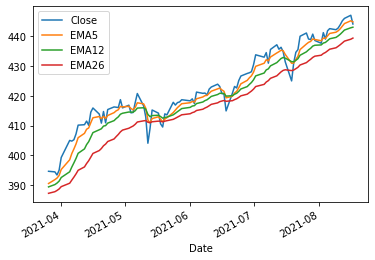

In [3]:
df_data.Close[-100:].plot()
df_data.EMA5[-100:].plot()
df_data.EMA12[-100:].plot()
df_data.EMA26[-100:].plot()
plt.legend()

                 Open       High        Low     Close     Volume  Dividends  \
Date                                                                          
2011-08-18  95.735754  98.373622  93.180061  0.009255  512956300        0.0   
2011-08-19  92.826686  95.226241  92.448674  0.004940  428281300        0.0   
2011-08-22  94.642816  94.692126  92.374746  0.005148  275090600        0.0   
2011-08-23  92.982843  95.793282  92.514437  0.013708  331136600        0.0   
2011-08-24  95.481004  97.165621  95.259124  0.017492  246869700        0.0   

            Stock Splits      Week   Day  PrevDayChng       EMA5     EMA12  \
Date                                                                         
2011-08-18             0  0.615385  0.75     0.547045  94.100441  0.001217   
2011-08-19             0  0.615385  1.00     0.547045  93.588201  0.000540   
2011-08-22             0  0.634615  0.00     0.465403  93.271371  0.000000   
2011-08-23             0  0.634615  0.25     0.551041  9

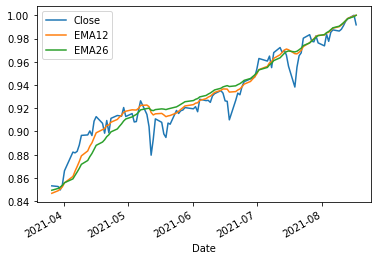

In [4]:
price_scaler = MinMaxScaler()
df_data_scaled = df_data
df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])

indicator_cols =['Week', 'Day', 'PrevDayChng', 'EMA12', 'EMA26', 'MACD', 'Signal']
indicator_scaler = MinMaxScaler()
df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
print(df_data_scaled.head())

prices_sc = df_data_scaled.Close[-100:]
prices_sc.plot()
df_data_scaled.EMA12[-100:].plot()
df_data_scaled.EMA26[-100:].plot()
plt.legend()

In [5]:
def xy_priceinputs(df, x_len=60, y_len=10):
    prices = df.Close
    X = []
    y = []
    for i in range(len(prices) - x_len - y_len):
        X.append(prices[i:i+x_len])
        y.append(prices[i+x_len:i+x_len+y_len])

    return np.array(X), np.array(y)

X,y = xy_priceinputs(df_data)
print(X.shape, y.shape)
X_train, X_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1] , 1)
y_test = y_test.reshape(y_test.shape[0],y_test.shape[1] , 1)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_test[:,0,0])

(2446, 60) (2446, 10)
(2396, 60, 1) (50, 60, 1)
(2396, 10, 1) (50, 10, 1)
[0.91810875 0.91550611 0.9178289  0.91844454 0.92054345 0.91950805
 0.92135496 0.91698929 0.92770771 0.92656032 0.92681215 0.92504903
 0.93053416 0.93249314 0.93515173 0.93296894 0.92633634 0.9259446
 0.91001387 0.92669142 0.9330087  0.93157684 0.93859604 0.94283558
 0.94525023 0.94589603 0.94690675 0.95356094 0.96279823 0.96058014
 0.96487589 0.95493676 0.96785202 0.972232   0.96804858 0.96987356
 0.96569014 0.95611594 0.93823103 0.95532979 0.96512857 0.96768357
 0.98026201 0.98329427 0.97765089 0.97714544 0.98225544 0.97624705
 0.97366394 0.98365928]


## Model

In [6]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

def LSTM_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(X.shape[1],1), return_sequences=True))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(75))
    model.add(Dense(10))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = LSTM_model()

In [7]:
from keras.callbacks import EarlyStopping
np.random.seed(1)

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

model.fit(X_train, y_train, epochs=50, callbacks=[callback])
# model.fit(X_train, y_train)

Epoch 1/50
75/75 [==============================] - 13s 119ms/step - loss: 0.0125
Epoch 2/50
75/75 [==============================] - 8s 105ms/step - loss: 7.7855e-04
Epoch 3/50
75/75 [==============================] - 8s 101ms/step - loss: 6.3910e-04
Epoch 4/50
75/75 [==============================] - 8s 105ms/step - loss: 7.1778e-04
Epoch 5/50
75/75 [==============================] - 8s 103ms/step - loss: 7.1865e-04
Epoch 6/50
75/75 [==============================] - 8s 108ms/step - loss: 5.9622e-04
Epoch 7/50
75/75 [==============================] - 8s 110ms/step - loss: 6.5024e-04
Epoch 8/50
75/75 [==============================] - 8s 110ms/step - loss: 6.0379e-04
Epoch 9/50
75/75 [==============================] - 9s 116ms/step - loss: 7.6430e-04
Epoch 10/50
75/75 [==============================] - 8s 104ms/step - loss: 5.6936e-04
Epoch 11/50
75/75 [==============================] - 7s 99ms/step - loss: 5.7542e-04
Epoch 12/50
75/75 [==============================] - 7s 99ms/step -

In [8]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 40ms/step - loss: 2.5224e-04


0.0002522356517147273

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[0.03708632 0.03713825 0.037191   ... 0.9074017  0.90640044 0.90684277] [0.03880009 0.03601704 0.03745496 ... 0.89485293 0.90722247 0.90627096]


<AxesSubplot:>

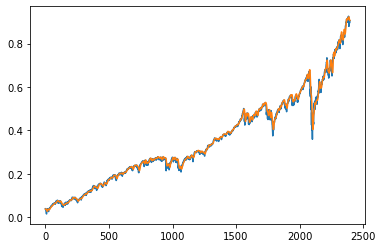

In [10]:
print(y_pred_train[:,0], y_train[:,0,0])

sns.lineplot(x=np.arange(0,len(y_train)), y= y_train[:,0,0])
sns.lineplot(x=np.arange(0,len(y_pred_train)), y= y_pred_train[:,0])

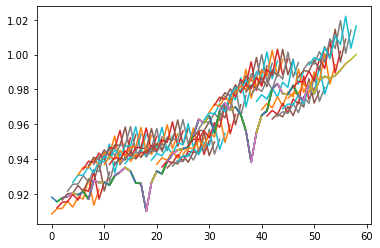

In [11]:
for i in range(len(y_test)):

    sns.lineplot(x=np.arange(i,i+len(y_test[i])), y= y_test[i][:,0])
    sns.lineplot(x=np.arange(i,i+len(y_pred_test[i])), y= y_pred_test[i])

[0.9085388  0.9120225  0.916592   0.92167264 0.92658854 0.93090403
 0.934137   0.9362345  0.93686956 0.9370435  0.9369992  0.9369157
 0.9367187  0.9368514  0.9374868  0.93873614 0.9402246  0.9411485
 0.9412769  0.93939954 0.93707806 0.93548405 0.93492347 0.9359715
 0.93873936 0.94289166 0.9477504  0.95262647 0.95739734 0.962343
 0.9669002  0.9709722  0.9734586  0.9752021  0.9767165  0.97775745
 0.9784422  0.9784603  0.97709036 0.9730985  0.9683757  0.9647147
 0.96302265 0.9644416  0.9688458  0.9748268  0.9811118  0.98708075
 0.9915684  0.9939669 ] [0.91810875 0.91550611 0.9178289  0.91844454 0.92054345 0.91950805
 0.92135496 0.91698929 0.92770771 0.92656032 0.92681215 0.92504903
 0.93053416 0.93249314 0.93515173 0.93296894 0.92633634 0.9259446
 0.91001387 0.92669142 0.9330087  0.93157684 0.93859604 0.94283558
 0.94525023 0.94589603 0.94690675 0.95356094 0.96279823 0.96058014
 0.96487589 0.95493676 0.96785202 0.972232   0.96804858 0.96987356
 0.96569014 0.95611594 0.93823103 0.95532979 

<AxesSubplot:>

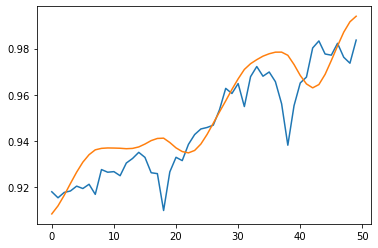

In [12]:
print(y_pred_test[:,0], y_test[:,0,0])

sns.lineplot(x=np.arange(0,len(y_test)), y= y_test[:,0,0])
sns.lineplot(x=np.arange(0,len(y_pred_test)), y= y_pred_test[:,0])

In [14]:
model.save("Multiout_model.h5")